In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import distinctipy as dpy

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
emb_test_df = pd.read_csv("emb_tsne_test.csv")
kmeans_test_df = pd.read_csv("km_emb_test.csv")

In [3]:
cell_types = list(emb_test_df["label"].unique())
cell_colors = np.array(dpy.get_colors(len(cell_types), pastel_factor=0.8))

In [4]:
def tshow(df, ax, title):
    ax.set_title(title, fontsize=16)
    colors = cell_colors[df['label_n']]
    ax.scatter(df['tsne0'], df['tsne1'], s=1, c=colors)
    ax.axis("off")

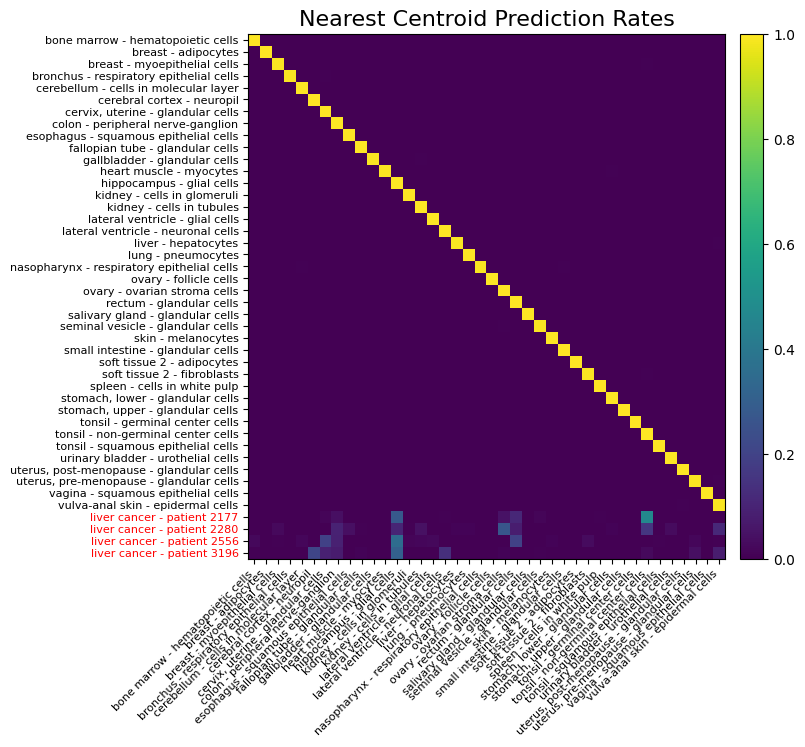

In [5]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

nct_df = pd.read_csv("nc_emb_Tt.csv")
ncl_df = pd.read_csv("nc_emb_Tl.csv")

nct_df["label"] = nct_df["label"].map(lambda s: s[:-2].replace("_", " "))

nc_df = pd.concat([nct_df, ncl_df])

labels = nc_df["label"]

im = ax.imshow(nc_df.drop(columns="label").values)
ax.set_yticks(range(len(labels)), labels, fontsize=8)
ax.set_xticks(range(40), labels[:40], rotation=45, ha='right', fontsize=8)


div = make_axes_locatable(ax)
cax = div.append_axes("right", size="5%", pad="3%")
fig.colorbar(im, cax=cax)

[l.set_color('red') for l in ax.yaxis.get_ticklabels()[40:]]
[l.set_color('red') for l in ax.yaxis.get_ticklines()[40:]]

ax.set_title("Nearest Centroid Prediction Rates", fontsize=16)

fig.tight_layout()
fig.savefig("./nc.png", dpi=600)

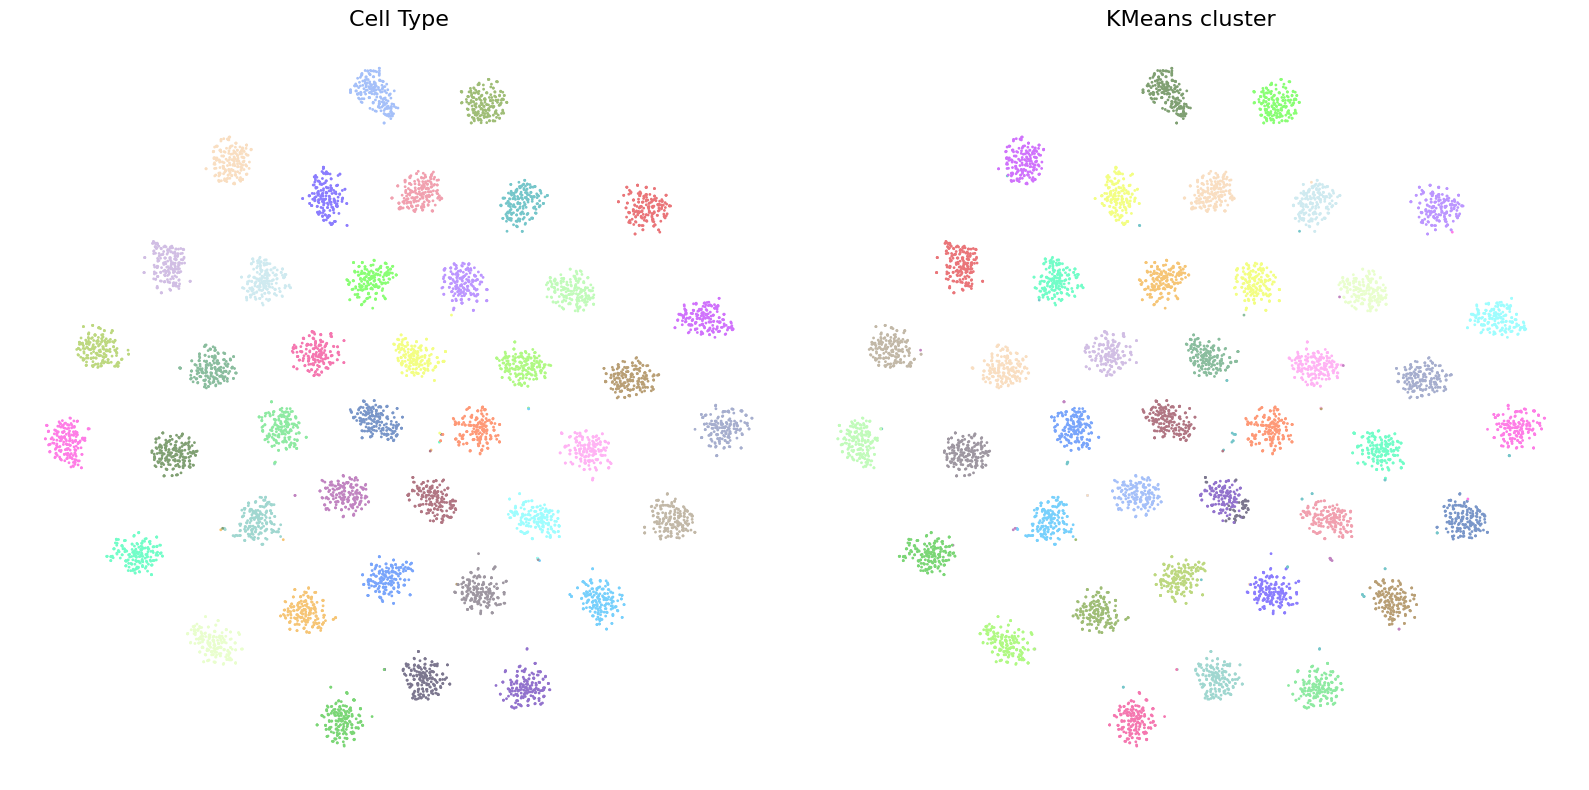

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

emb_test_df["label_n"] = emb_test_df["label"].map(cell_types.index)
emb_km_test_df = emb_test_df.copy()
emb_km_test_df["label_n"] = kmeans_test_df['kmeans_cluster']

tshow(emb_test_df, ax1, "Cell Type")
tshow(emb_km_test_df, ax2, "KMeans cluster")

fig.tight_layout()
fig.savefig("ct_kc_tsne.png", dpi=600)